<a href="https://colab.research.google.com/github/YangHyunu/SKT-FLY-AI-5/blob/main/2%EC%A3%BC%EC%B0%A8/21_RNN_TIME_SERIES_SAMSUNGipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [ ]:
samsung = pd.read_csv('/content/drive/MyDrive/SKT_FLY_AI /2주차/005930.KS.csv')

## RNN(LSTM) 삼성 주식 예측

In [ ]:
samsung.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.708984,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728027,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859375,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598145,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.099121,46880000


In [ ]:
samsung.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
samsung.columns =[col.replace(' ','_').lower() for col in samsung.columns]

In [ ]:
samsung.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [ ]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6140 entries, 0 to 6139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6140 non-null   object 
 1   open       6140 non-null   float64
 2   high       6140 non-null   float64
 3   low        6140 non-null   float64
 4   close      6140 non-null   float64
 5   adj_close  6140 non-null   float64
 6   volume     6140 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 335.9+ KB


In [ ]:
samsung.describe() # 거래량이 0인게 이상하다.

,open,high,low,close,adj_close,volume
count,6140.000000,6140.000000,6140.000000,6140.000000,6140.000000,6.140000e+03
mean,28480.757329,28755.807818,28194.350163,28470.889251,24623.113513,2.116503e+07
std,22693.164548,22869.592553,22498.317200,22671.685245,22169.192196,1.504671e+07
min,2540.000000,2760.000000,2420.000000,2730.000000,1988.168701,0.000000e+00
25%,10720.000000,10900.000000,10575.000000,10740.000000,7915.904663,1.169729e+07
50%,21250.000000,21490.000000,21000.000000,21260.000000,16446.014649,1.715452e+07
75%,45750.000000,46185.000000,45250.000000,45700.000000,39100.223633,2.617382e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,85300.000000,1.642150e+08


In [ ]:
samsung.tail()

,date,open,high,low,close,adj_close,volume
6135,2024-06-26,80100.0,81400.0,79900.0,81300.0,81300.0,17783242
6136,2024-06-27,81300.0,81600.0,80500.0,81600.0,81600.0,11739720
6137,2024-06-28,81900.0,81900.0,80800.0,81500.0,81500.0,9455929
6138,2024-07-01,81500.0,82100.0,81300.0,81800.0,81800.0,11317202
6139,2024-07-02,82500.0,82600.0,81600.0,81600.0,81600.0,4785455


In [ ]:
samsung.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
adj_close,0
volume,0


In [ ]:
samsung.isna().sum()

,0
date,0
open,0
high,0
low,0
close,0
adj_close,0
volume,0


- 거래량이 0인 날짜는 다 드랍

In [ ]:
samsung[samsung['volume']==0] # 127일

,date,open,high,low,close,adj_close,volume
23,2000-02-04,5130.0,5130.0,5130.0,5130.0,3736.008789,0
41,2000-03-01,5120.0,5120.0,5120.0,5120.0,3728.726074,0
66,2000-04-05,6800.0,6800.0,6800.0,6800.0,4952.214844,0
72,2000-04-13,6910.0,6910.0,6910.0,6910.0,5032.323730,0
84,2000-05-01,6000.0,6000.0,6000.0,6000.0,4369.602539,0
...,...,...,...,...,...,...,...
5564,2022-02-28,71900.0,71900.0,71900.0,71900.0,68423.648438,0
5567,2022-03-04,72900.0,72900.0,72900.0,72900.0,69375.296875,0
5570,2022-03-10,69500.0,69500.0,69500.0,69500.0,66139.703125,0
5573,2022-03-15,70200.0,70200.0,70200.0,70200.0,66805.851563,0


In [ ]:
samsung['volume'] = samsung['volume'].replace(0, np.NaN) # samsung.loc[samsung['volume]==0,'volume']]==0
samsung.isna().sum(axis=0)

,0
date,0
open,0
high,0
low,0
close,0
adj_close,0
volume,127


In [ ]:
samsung.dropna(inplace=True)

In [ ]:
samsung.isna().sum()

,0
date,0
open,0
high,0
low,0
close,0
adj_close,0
volume,0


In [ ]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6013 entries, 0 to 6139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6013 non-null   object 
 1   open       6013 non-null   float64
 2   high       6013 non-null   float64
 3   low        6013 non-null   float64
 4   close      6013 non-null   float64
 5   adj_close  6013 non-null   float64
 6   volume     6013 non-null   float64
dtypes: float64(6), object(1)
memory usage: 375.8+ KB


In [ ]:
samsung['date']= pd.to_datetime(samsung['date'])

In [ ]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6013 entries, 0 to 6139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       6013 non-null   datetime64[ns]
 1   open       6013 non-null   float64       
 2   high       6013 non-null   float64       
 3   low        6013 non-null   float64       
 4   close      6013 non-null   float64       
 5   adj_close  6013 non-null   float64       
 6   volume     6013 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 375.8 KB


In [ ]:
samsung.head()

,date,open,high,low,close,adj_close,volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.708984,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728027,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859375,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598145,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.099121,46880000.0


In [ ]:
samsung.head()

,date,open,high,low,close,adj_close,volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.708984,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728027,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859375,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598145,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.099121,46880000.0


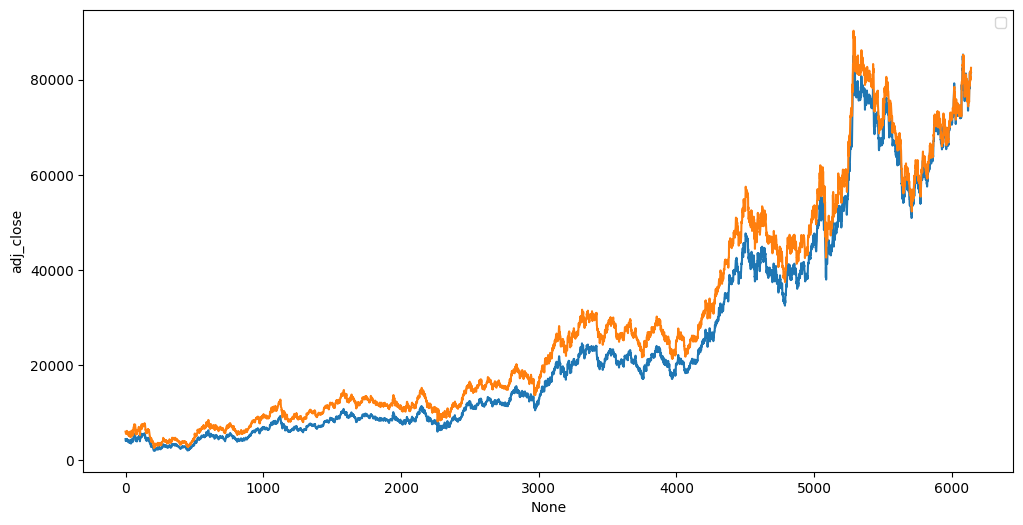

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(y=samsung['adj_close'], x=samsung.index)
sns.lineplot(y=samsung['open'], x=samsung.index)

plt.legend()
plt.show()

In [ ]:
samsung['ma3']  = np.around(samsung['close'].rolling(window=3).mean(),0)
samsung['ma5']  = np.around(samsung['close'].rolling(window=5).mean(),0)


In [ ]:
samsung.head()

,date,open,high,low,close,adj_close,volume,ma3,ma5
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.708984,74195000.0,NaN,NaN
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728027,74680000.0,NaN,NaN
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859375,54390000.0,5770.0,NaN
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598145,40305000.0,5580.0,NaN
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.099121,46880000.0,5643.0,5724.0


In [ ]:
samsung['mid'] = np.around((samsung['low']+samsung['high'])/2,0)
samsung.head()

,date,open,high,low,close,adj_close,volume,ma3,ma5,mid
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.708984,74195000.0,NaN,NaN,5885.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728027,74680000.0,NaN,NaN,5790.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859375,54390000.0,5770.0,NaN,5680.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598145,40305000.0,5580.0,NaN,5515.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.099121,46880000.0,5643.0,5724.0,5675.0


In [ ]:
samsung.dropna(inplace=True)

In [ ]:
samsung

,date,open,high,low,close,adj_close,volume,ma3,ma5,mid
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.099121,46880000.0,5643.0,5724.0,5675.0
5,2000-01-11,5820.0,6100.0,5770.0,5770.0,4202.099121,59745000.0,5693.0,5656.0,5935.0
6,2000-01-12,5610.0,5740.0,5600.0,5720.0,4165.686035,29220000.0,5753.0,5684.0,5670.0
7,2000-01-13,5600.0,5740.0,5560.0,5710.0,4158.403809,41190000.0,5733.0,5702.0,5650.0
8,2000-01-14,5720.0,5880.0,5680.0,5830.0,4245.796387,49375000.0,5753.0,5760.0,5780.0
...,...,...,...,...,...,...,...,...,...,...
6135,2024-06-26,80100.0,81400.0,79900.0,81300.0,81300.000000,17783242.0,80900.0,80860.0,80650.0
6136,2024-06-27,81300.0,81600.0,80500.0,81600.0,81600.000000,11739720.0,81233.0,80860.0,81050.0
6137,2024-06-28,81900.0,81900.0,80800.0,81500.0,81500.000000,9455929.0,81467.0,81160.0,81350.0
6138,2024-07-01,81500.0,82100.0,81300.0,81800.0,81800.000000,11317202.0,81633.0,81400.0,81700.0


## 3.학습 테스트 데이터 분리

In [ ]:
train = samsung.iloc[:int(samsung.shape[0]*0.8),:]
test = samsung.iloc[int(samsung.shape[0]*0.8):,:]

In [ ]:
train.shape

(4807, 10)

In [ ]:
test.shape

(1202, 10)

In [ ]:
date_data = train['date']
X_train = train.drop(['close','adj_close','date'],axis=1)
y_train = train['close']

In [ ]:
X_train.shape, y_train.shape

((4807, 7), (4807,))

In [ ]:
# 넘파이 배열로 변환
X_train = X_train.to_numpy()# ['Close']를 제외한 모든 행과 열
y_train= y_train.to_numpy().reshape(-1,1)#['Close']인 모든 행

In [ ]:
X_train.shape, y_train.shape

((4807, 7), (4807, 1))

In [ ]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train) # Use fit_transform to fit and transform in one step
y_train_s = scaler.fit_transform(y_train)

In [ ]:
X_train_s.shape, y_train_s.shape

((4807, 7), (4807, 1))

In [ ]:
## 4. 타임 스텝 데이터 형태로 변형

In [ ]:
def make_sequence_dataset(X,y,window_size):
  feature_list =[]
  label_list =[]

  for i in range(len(X)-window_size):
    feature_list.append(X[i:i+window_size])
    label_list.append(y[i+window_size])
  return np.array(feature_list), np.array(label_list)

In [ ]:
X_train_w,y_train_w = make_sequence_dataset(X_train_s,y_train_s,20)

In [ ]:
X_train_w.shape, y_train_w.shape

((4787, 20, 7), (4787, 1))

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential()
model.add(layers.LSTM(32, activation='tanh', input_shape=(20, 7)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,665 (22.13 KB)

 Trainable params: 5,665 (22.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [ ]:
EPOCHS=50
BATCH_SIZE= 16

history = model.fit(X_train_w, y_train_w, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)


Epoch 1/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0066 - mae: 0.0397 - mse: 0.0066 - val_loss: 0.0080 - val_mae: 0.0732 - val_mse: 0.0080
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.2067e-04 - mae: 0.0083 - mse: 1.2067e-04 - val_loss: 0.0051 - val_mae: 0.0561 - val_mse: 0.0051
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.0681e-04 - mae: 0.0079 - mse: 1.0681e-04 - val_loss: 0.0052 - val_mae: 0.0571 - val_mse: 0.0052
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 9.1554e-05 - mae: 0.0073 - mse: 9.1554e-05 - val_loss: 0.0034 - val_mae: 0.0457 - val_mse: 0.0034
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 9.1497e-05 - mae: 0.0072 - mse: 9.1497e-05 - val_loss: 0.0042 - val_mae: 0.0514 - val_mse: 0.0042
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.1827e-05 - mae: 0.0069 - mse: 8.1827e-05 - val_loss: 0.0047 - val_mae: 0.0570 - val_mse: 0.0047
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss

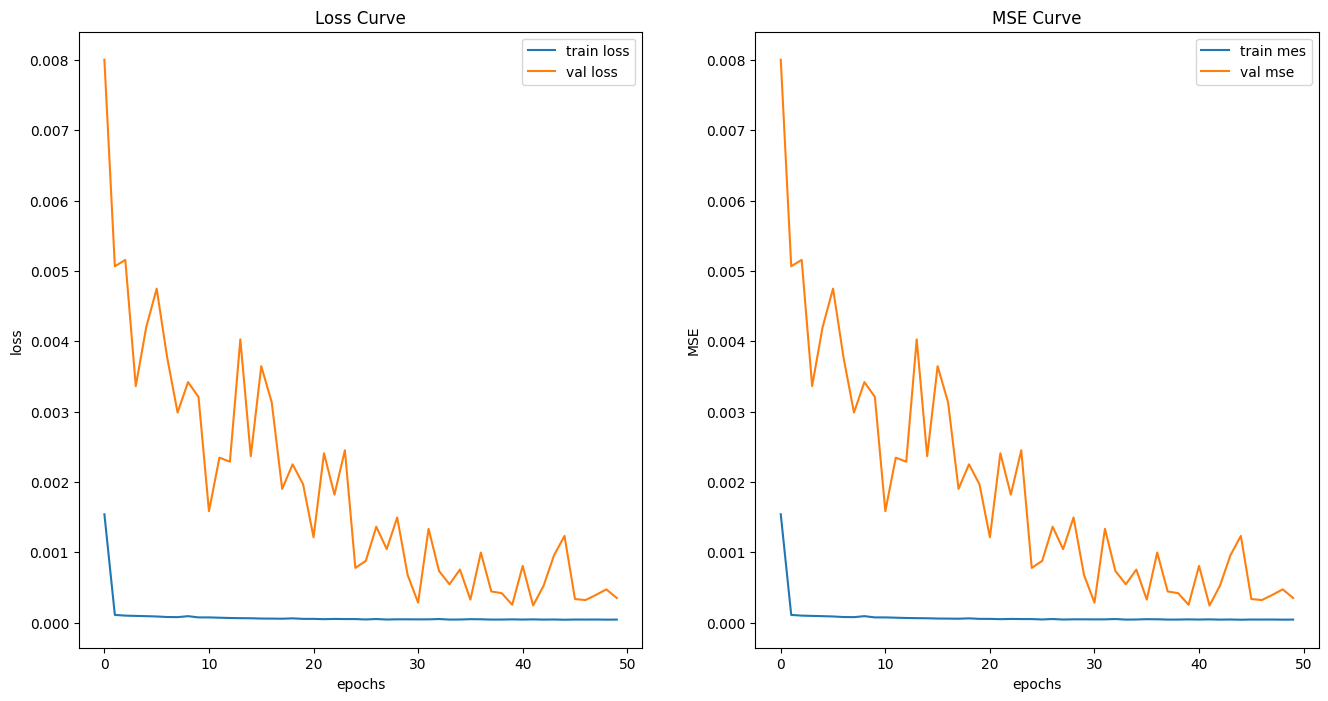

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('MSE')
    plt.plot(hist['epoch'], hist['mse'], label='train mes')
    plt.plot(hist['epoch'], hist['val_mse'], label='val mse')
    plt.title('MSE Curve')
    plt.legend()
    plt.show()

plot_history(history)

# 평가

In [ ]:
date_data = test['date']
X_test = test.drop(['close','adj_close','date'],axis=1)
y_test = test['close']

In [ ]:
# 넘파이 배열로 변환
X_test = X_test.to_numpy()# ['Close']를 제외한 모든 행과 열
y_test= y_test.to_numpy().reshape(-1,1)#['Close']인 모든 행

In [ ]:
scaler = MinMaxScaler()
X_test_s = scaler.fit_transform(X_test) # Use fit_transform to fit and transform in one step
y_test_s = scaler.fit_transform(y_test)

In [ ]:
X_test_s.shape, y_test_s.shape

((1202, 7), (1202, 1))

In [ ]:
X_test_w,y_test_w = make_sequence_dataset(X_test_s,y_test_s,20)

In [ ]:
y_pred = model.predict(X_test_w)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred

array([[0.02448255],
       [0.01864258],
       [0.00901077],
       ...,
       [0.7617037 ],
       [0.7598241 ],
       [0.7714077 ]], dtype=float32)

In [ ]:
y_pred.shape

(1182, 1)

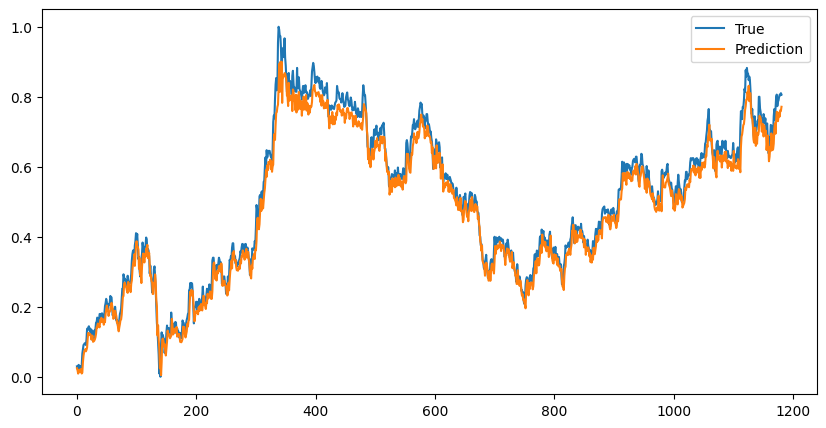

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test_w, label='True')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.show()

In [ ]:
date_data_trimmed = date_data[-len(y_test_inverse):]  # 실제 값의 길이에 맞게 날짜 데이터를 슬라이싱

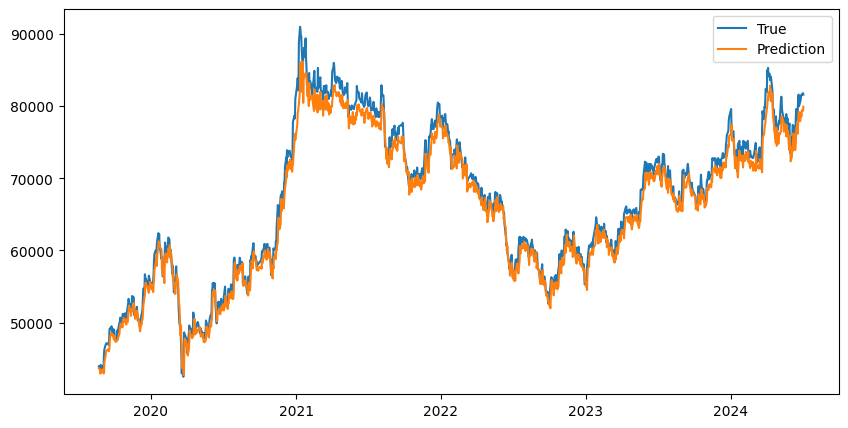

In [ ]:
# 예측 값 역변환 (y_pred를 원래 값으로 되돌림)
y_pred_inverse = scaler.inverse_transform(y_pred)

# 실제 값 역변환 (y_test_w도 원래 값으로 되돌림)
y_test_inverse = scaler.inverse_transform(y_test_w)

# 역변환된 값으로 그래프 다시 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(date_data_trimmed,y_test_inverse, label='True')  # 역변환된 실제 값
plt.plot(date_data_trimmed,y_pred_inverse, label='Prediction')  # 역변환된 예측 값
plt.legend()
plt.show()


In [ ]:
X_train.shape